# Week 11- Building a CNN Image Classifier

In [43]:
import pandas as pd
import numpy as np

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.utils import np_utils
from keras import backend as K
from keras.preprocessing.text import Tokenizer

import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import recall_score,precision_score,accuracy_score

## 1. Load the MNIST data set.

In [57]:
#Load and split the minst data into train and test
(X_train,y_train),(X_test,y_test)=mnist.load_data()

In [58]:
print('X-train : ', X_train.shape, '\nX-test : ', X_test.shape, ' \ny_train : ', y_train.shape, '\ny_test : ', y_test.shape)

X-train :  (60000, 28, 28) 
X-test :  (10000, 28, 28)  
y_train :  (60000,) 
y_test :  (10000,)


## 2. Display the first five images in the training data set (see section 8.1 in the Machine Learning with Python Cookbook). Compare these to the first five training labels.

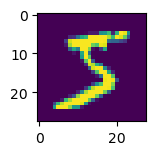

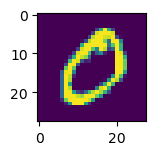

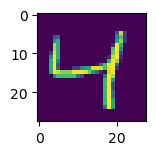

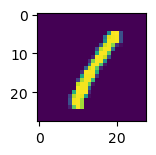

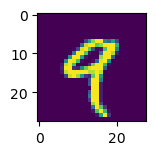

In [59]:
# plotting the first 5 images in the train set of MNIST
for i in range(5):
    plt.subplot(330 + i + 1)
    plt.imshow(X_train[i])
    plt.title(y_train[i],fontweight='bold')  # First five training labels 
    plt.show()

## 3. Build and train a Keras CNN classifier on the MNIST training set.

In [60]:
#Scikitlearn suggests using OneHotEncoder for X matrix i.e. the features you feed in a model, 
#and to use a LabelBinarizer for the y labels.

#Building input vector
lb=LabelBinarizer()
y_test=lb.fit_transform(y_test)
y_train=lb.fit_transform(y_train)
y_classes=lb.classes_
y_classes

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [61]:
# Start neural network
model=Sequential()

model.add(Conv2D(25,kernel_size=(3,3),strides=(1,1),padding='valid',activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(1,1)))

model.add(Flatten())

# Add fully connected layer with a ReLU activation function
model.add(Dense(50,activation='relu'))

# Add fully connected layer with a softmax activation function
model.add(Dense(10,activation='softmax'))

# Compile neural network
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
# Set callback functions to early stop training and save the best model so far
callbacks=[EarlyStopping(monitor='val_loss',patience=10),
          ModelCheckpoint(filepath='best_model_MNIST.h5',monitor='val_loss',save_best_only=True)]

In [62]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 26, 26, 25)        250       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 26, 26, 25)       0         
 2D)                                                             
                                                                 
 flatten_6 (Flatten)         (None, 16900)             0         
                                                                 
 dense_11 (Dense)            (None, 50)                845050    
                                                                 
 dense_12 (Dense)            (None, 10)                510       
                                                                 
Total params: 845,810
Trainable params: 845,810
Non-trainable params: 0
_______________________________________________

In [63]:
# Train neural network
history=model.fit(X_train,y_train,batch_size=128,callbacks=callbacks,epochs=200,validation_data=(X_test,y_test))

Epoch 1/200
469/469 [==============================] - 34s 70ms/step - loss: 2.3371 - accuracy: 0.8638 - val_loss: 0.1163 - val_accuracy: 0.9691
Epoch 2/200
469/469 [==============================] - 33s 71ms/step - loss: 0.0869 - accuracy: 0.9758 - val_loss: 0.0970 - val_accuracy: 0.9731
Epoch 3/200
469/469 [==============================] - 34s 71ms/step - loss: 0.0397 - accuracy: 0.9883 - val_loss: 0.0787 - val_accuracy: 0.9781
Epoch 4/200
469/469 [==============================] - 32s 69ms/step - loss: 0.0184 - accuracy: 0.9947 - val_loss: 0.1103 - val_accuracy: 0.9747
Epoch 5/200
469/469 [==============================] - 32s 69ms/step - loss: 0.0104 - accuracy: 0.9967 - val_loss: 0.1054 - val_accuracy: 0.9776
Epoch 6/200
469/469 [==============================] - 33s 69ms/step - loss: 0.0058 - accuracy: 0.9983 - val_loss: 0.1139 - val_accuracy: 0.9807
Epoch 7/200
469/469 [==============================] - 33s 70ms/step - loss: 0.0028 - accuracy: 0.9991 - val_loss: 0.1389 - val_ac

In [65]:
y_pred=model.predict(X_test).round()

313/313 [==============================] - 3s 8ms/step


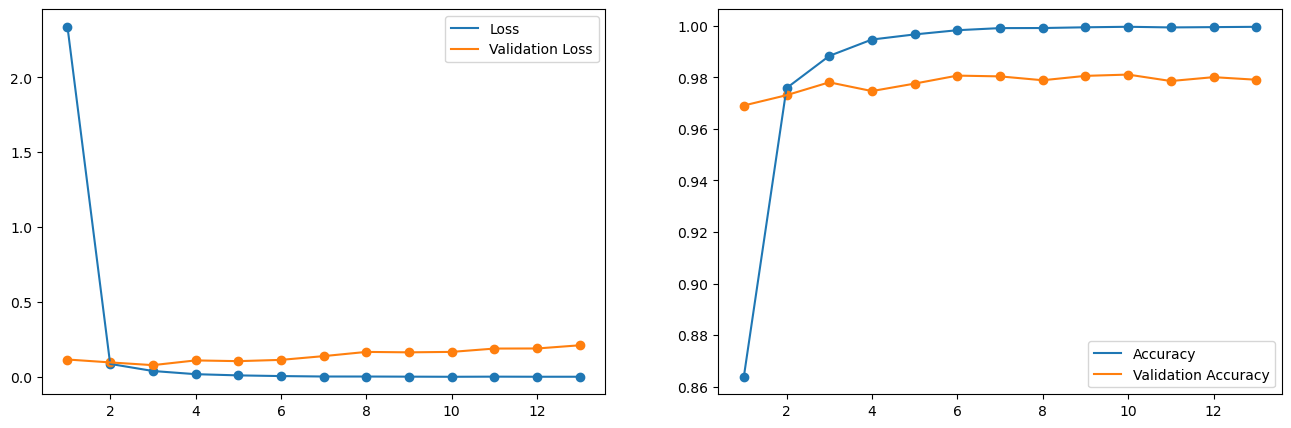

In [66]:
#Plotting losses and accuracy
epochs=len(history.history['loss'])

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(16,5))

ax1.plot(np.arange(1,epochs+1),history.history['loss'],label='Loss')
ax1.plot(np.arange(1,epochs+1),history.history['val_loss'],label='Validation Loss')
ax1.scatter(np.arange(1,epochs+1),history.history['loss'])
ax1.scatter(np.arange(1,epochs+1),history.history['val_loss'])

ax2.plot(np.arange(1,epochs+1),history.history['accuracy'],label='Accuracy')
ax2.plot(np.arange(1,epochs+1),history.history['val_accuracy'],label='Validation Accuracy')
ax2.scatter(np.arange(1,epochs+1),history.history['accuracy'])
ax2.scatter(np.arange(1,epochs+1),history.history['val_accuracy'])

ax1.legend()
ax2.legend()
plt.show()


## 4.Report the test accuracy of your model.

In [67]:
#printing Accuracy, REcall, Precision
print(f"Accuracy: {accuracy_score(y_test,y_pred)*100:0.2f}%")
print(f"Precision: {precision_score(y_test,y_pred,average='macro')*100:0.2f}%")
print(f"Recall: {recall_score(y_test,y_pred,average='macro')*100:0.2f}%")

Accuracy: 97.91%
Precision: 97.93%
Recall: 97.89%


In [68]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Loss: ', score[0])
print('Accuracy: ', score[1])

Loss:  0.211303249001503
Accuracy:  0.9790999889373779


## 5. Display a confusion matrix on the test set classifications.

In [69]:
from sklearn.metrics import confusion_matrix
matrix=confusion_matrix(y_test.argmax(axis=1),y_pred.argmax(axis=1))

In [70]:
matrix

array([[ 972,    2,    1,    0,    0,    0,    1,    1,    1,    2],
       [   1, 1127,    1,    2,    1,    1,    0,    2,    0,    0],
       [   4,    2, 1010,    1,    2,    0,    1,    8,    4,    0],
       [   1,    0,    1,  995,    0,    4,    0,    1,    5,    3],
       [   2,    2,    0,    0,  965,    0,    3,    1,    1,    8],
       [   3,    0,    0,    9,    0,  873,    4,    1,    2,    0],
       [  10,    4,    1,    1,    2,    3,  933,    0,    4,    0],
       [   2,    1,   10,    4,    1,    0,    0, 1001,    2,    7],
       [   4,    2,    6,    3,    3,    0,    1,    7,  939,    9],
       [   4,    4,    0,    5,    8,    4,    0,    6,    2,  976]],
      dtype=int64)

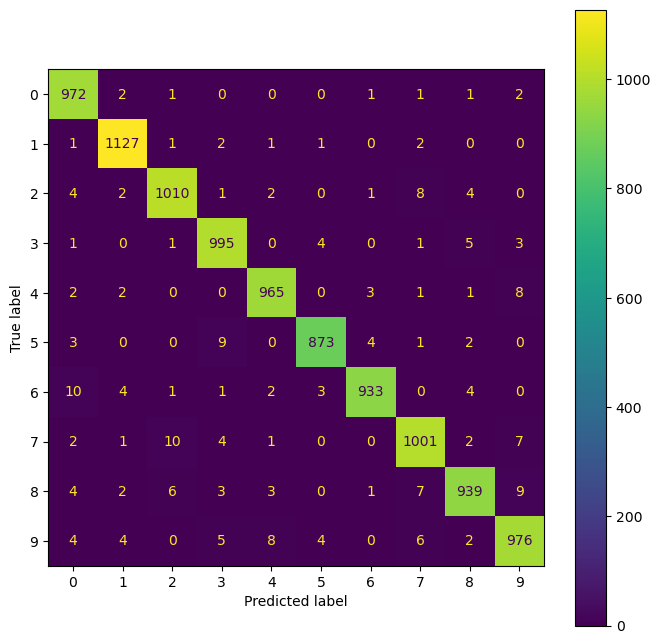

In [73]:
from sklearn.metrics import ConfusionMatrixDisplay

fig,ax=plt.subplots(figsize=(8,8))
fig=ConfusionMatrixDisplay(confusion_matrix=matrix,display_labels=y_classes)
fig.plot(ax=ax)
plt.show()

## 6. Summarize your results.

Upon the analysis of the results, I have observed the below thing in the model:

1. Accuracy: 97.91% - This shows that the model is the best fit. As per studies, any model which has over 50% accuracy is a good model.

2. Precision: 97.93% - The higher the precision, the better the model. As we have 97.98%, we can say that our model is a goodfit.

3. Recall: 97.89% - Recall should be high as possible. As we have 97.98%, we can say that our model is a goodfit.